# Pesos de pasajeros en taxis acuaticos
## Distribución Normal No Estandard
###### https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_dist.html
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dist.html#scipy.stats.norm
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncdist.html#scipy.stats.truncnorm


In [1]:
# Configuración
import math
import numpy as np
from scipy.stats import norm
from dist_prob_plotgraphs import distr_prob

**Contexto**
+ En el undimiento de un taxi acuático en el Inner Harbor de Baltimore, de las 25 personas a bordo, 5 murieron y 16 resultaron lesionadas. 
+ Una investigación reveló que la carga segura de pasajeros del taxi acuático era de 3500 libras. 
+ Suponiendo un peso medio de 140 libras por pasajero, el barco tenía permitido llevar 25 pasajeros, 
    + pero la media de 140 libras fue determinada hace 44 años, cuando la gente no pesaba tanto como ahora. 
        + Se descubrió que el peso medio de los 25 pasajeros que viajaban en el barco que se hundió era de 168 libras. 
        + El National Transportation and Safety Board sugirió que la antigua media estimada de 140 libras se actualizara a 174 libras, 
            + de manera que la carga segura de 3500 libras ahora sólo permitiría 20 pasajeros en vez de 25.

**Analisis**
+ Supongamos “el peor de los casos”, en el que todos los pasajeros son hombres adultos. 
+ Esto podría ocurrir fácilmente en una ciudad donde se realizan convenciones en las que personas del mismo género suelen viajar en grupos. 
+ En concordancia con los datos de la National Health and Nutrition Examination Survey, 
    + suponga que los pesos de hombres se distribuyen normalmente, con una media de 172 lb y una desviación estándar de 29 lb.

+ Veamos los estadísticos y la funcón de distribución

media: 172.0, desv.std.: 29.0 , sesgo: 0.0, kurtosis: 0.0)


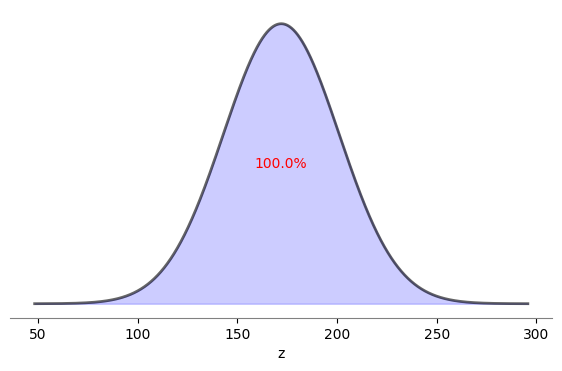

In [2]:
# Estadísticos de la distribución uniforme con los datos aportados

# Establecemos los valores de media y desvío estandard de la distribución.
loc=172
scale=29

# Vemos los estadísticos de la función de distirbución
mean, var, skew, kurt = norm.stats(loc=loc, scale=scale, moments='mvsk')
sigm = math.sqrt(var)
print(f"media: {mean}, desv.std.: {sigm} , sesgo: {skew}, kurtosis: {kurt}")
distr_prob(norm(loc=loc, scale=scale))

**Interpretación**
+ Las personas bajo estudio tienen un peso medio de 172lb con un desvío estandar de 29lb.
+ No es probable que se encuentren personas con menos de 50 o mas de 275 lb dentro de esta población.

+ a. Si seleccionamos al azar a un hombre, calcule la probabilidad de que pese menos de 174 lb 
    + (el valor sugerido por el National Transportation and Safety Board).
+ b. Calcular la probabilidad de que pese más de 175 libras.

media: 172.0, desv.std.: 29.0 , sesgo: 0.0, kurtosis: 0.0)
Probabilidad de encontrar una persona que pese menos de 174: 0.527491466311581


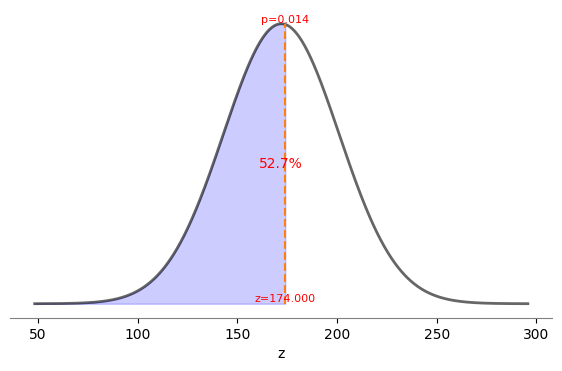

Probabilidad de una persona que pese mas ese peso 174: 0.47250853368841905


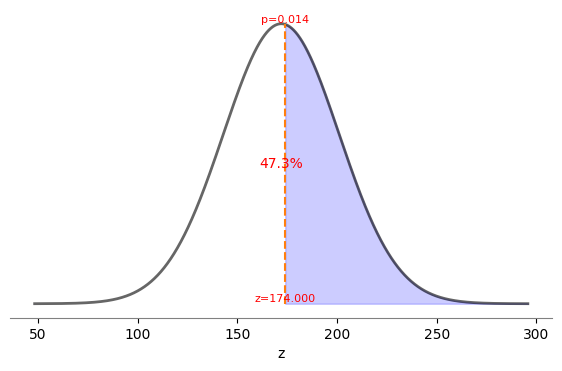

In [3]:
# a. ¿qué probabilidad hay de que una persona pese a hasta 174lb?
max = 174
print(f"media: {mean}, desv.std.: {sigm} , sesgo: {skew}, kurtosis: {kurt})")
p= norm.cdf(max, loc=mean, scale=sigm)

print(f"Probabilidad de encontrar una persona que pese menos de {max}: {p}")
distr_prob(norm(loc=mean, scale=sigm), b=max)

print(f"Probabilidad de una persona que pese mas ese peso {max}: {1-p}")
distr_prob(norm(loc=mean, scale=sigm), b=max, between=False)

**Interpretación**
+ Existe una probabilidad de 0.5279 de elegir al azar a un hombre que pese menos de 174 lb. 
+ Se infiere que :
    + El 52.7% de los hombres pesan menos de 174 lb. 
    + El 47.3% de los hombres pesan más de 174 lb.
+ Es por esto que la NDTSB haya establecido este peso como máximo para poder usar este transporte.

c. ¿Qué peso separa al 99.5% de los hombres menos pesados del 0.5% de los hombres más pesados? 

Estadísticos de la distribución: media: 172.0, desv.std.: 29.0 , sesgo: 0.0, kurtosis: 0.0)
El peso separa al 99.5% de los hombres menos pesados del 0.5% de los hombres más pesados es: 246.69904980291813
El valor exacto de probabilidad para este peso ( 246.69904980291813 es:0.0004986118285143933
Probabilidad de encontrar una persona que pese menos de 246.69904980291813: 0.995


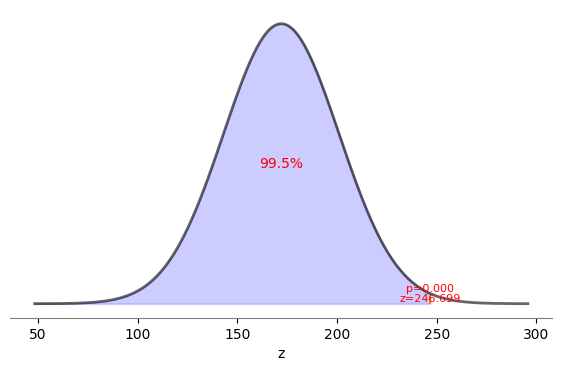

Probabilidad de encontrar una persona que pese mas de 246.69904980291813: 0.0050000000000000044


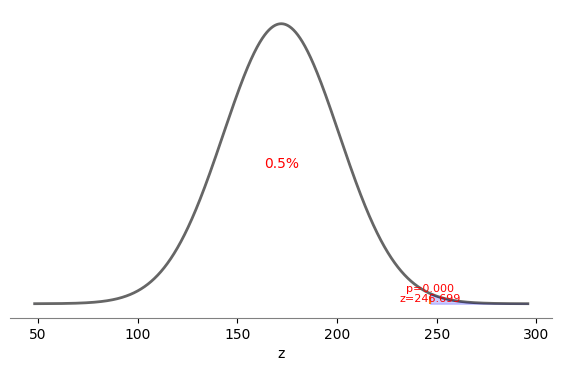

In [4]:
# b. ¿Qué peso separa al 99.5% de los hombres menos pesados del 0.5% de los hombres más pesados? 

print(f"Estadísticos de la distribución: media: {mean}, desv.std.: {sigm} , sesgo: {skew}, kurtosis: {kurt})")

# Establecemos el percenitl que estamos buscando
percentil = 0.995

# Establecemos el valor de x o z (peso) correspondiente al percentil buscado
peso = norm(loc=mean, scale=sigm).ppf(percentil)    # Este es el valor buscado
print(f"El peso separa al 99.5% de los hombres menos pesados del 0.5% de los hombres más pesados es: {peso}")
p95 = norm(loc=mean, scale=sigm).pdf(peso)
print(f"El valor exacto de probabilidad para este peso ( {peso} es:{p95}")

# Comprobación-Demostración
# Calculamos la probabilidad acumulada correspondiente a ese valor de x (peso)
p= norm.cdf(peso, loc=mean, scale=sigm)

print(f"Probabilidad de encontrar una persona que pese menos de {peso}: {p}")
distr_prob(norm(loc=mean, scale=sigm), b=peso)

print(f"Probabilidad de encontrar una persona que pese mas de {peso}: {1-p}")
distr_prob(norm(loc=mean, scale=sigm), b=peso, between=False)

**Interpretación**
El peso de 247 libras separa al 99.5% de los hombres menos pesados del 0.5% de los hombres más pesados.


+ c. Calcule la probabilidad de que, si se selecciona un hombre al azar, su peso sea mayor que 175 libras.
+ d. Calcule la probabilidad de que 20 hombres elegidos al azar tengan una media mayor que 175 libras 
    + (de manera que su peso total exceda la capacidad segura de 3500 libras).

media: 172.0, desv.std.: 29.0 , sesgo: 0.0, kurtosis: 0.0)
Probabilidad de una persona que pese mas que 175: 0.46


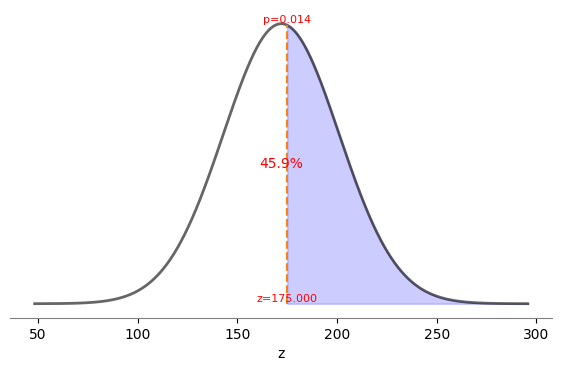

Para la probabilidad de que 20 personas pesen más que 175 libras la curva se angosta pq cambia sigma:
* dev.std. para 1 persona es: 29.00, porque es una observación de la población con los parámetros 172.0 y 29.0.
* desv.std. para 20 personas implica que se toma una muestra de 20 personas de la población con los parámetros 172.0 y 29.0.
    * implica que hay que rectificar la media, sigma(xraya)= (29.0)/(4.47) = 6.48
Armamos la nueva distribución de probabilidad y calculamos la probabilidad.
media: 172.0, desv.std.: 6.484597134749389
Probabilidad de que 20 personas que pesen mas que 175: 0.32


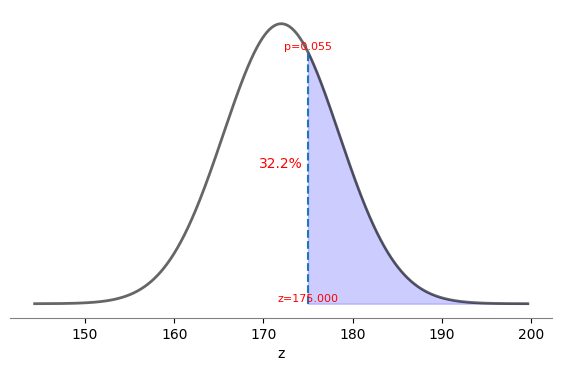

In [21]:
# c. ¿qué probabilidad hay de que una persona pese mas de 175 libras?
max = 175
print(f"media: {mean}, desv.std.: {sigm} , sesgo: {skew}, kurtosis: {kurt})")
p= norm.sf(max, loc=mean, scale=sigm)

print(f"Probabilidad de una persona que pese mas que {max}: {p:.2f}")
distr_prob(norm(loc=mean, scale=sigm), b=max, between=False)

# c. Probabilidad de que 20 hombres elegidos al azar tengan una media mayor que 175 libras.
sigm_xraya=sigm/math.sqrt(20)
print("Para la probabilidad de que 20 personas pesen más que 175 libras la curva se angosta pq cambia sigma:")
print(f"* dev.std. para 1 persona es: {sigm:.2f}, porque es una observación de la población con los parámetros {mean} y {sigm}.")
print(f"* desv.std. para 20 personas implica que se toma una muestra de 20 personas de la población con los parámetros {mean} y {sigm}.")
print(f"    * implica que hay que rectificar la media, sigma(xraya)= ({sigm})/({math.sqrt(20):.2f}) = {sigm_xraya:.2f}")
print(f"Armamos la nueva distribución de probabilidad y calculamos la probabilidad.")
print(f"media: {mean}, desv.std.: {sigm_xraya}")
p= norm.sf(max, loc=mean, scale=sigm_xraya)
print(f"Probabilidad de que 20 personas que pesen mas que {max}: {p:.2f}")
distr_prob(norm(loc=mean, scale=sigm_xraya), a=max)


**Interpretación**
+ La probabilidad deque 20 personas que pesen más que 175 libras es 32%. 
    + Esta probabilidad es considerablemente riesgosa.
        + Para considerar esto utilizamos la regla del suceso infrecuente.
            + Un suceso es infrecuente si su probabilidad de ocurrencia es menor al 5% y/o al 1% según el caso.
                + En este caso es mayor a ambos porcentajes y por lo tanto no es infrecuente.
+ Si esto sucede entonces existe riesgo de superar la capaciadad máxima de soportar peso que es 3500 libras.
    + Ya han muerto 21 personas por este tema y la probabjilidad es considerable y riesgosa de que vuelva a suceder.
+ Lo más recomendable es limitar el múmero de pasajeros a menos de 20 aún cuando la capacidad de 20 no sea suficiente comercialmente.

**Notas**
+ Los cálculos que se utilizaron aquí son exactamente iguales a los cálculos que utilizan los ingenieros al diseñar:
  + teleféricos, elevadores, escaleras eléctricas, aviones y otros aparatos que transportan personas.

____________________________________________________________________________________________________________________________________________________________